In [3]:
#IMPORT LIBRARIES
import tensorflow as tf  #TRAINING NEURAL NETWORK
from tensorflow.keras import layers, models  #TRAINING NEURAL NETWORK
from tensorflow.keras.datasets import mnist   #TRAINING NEURAL NETWORK
import matplotlib.pyplot as plt  
from PIL import Image  #HANDLES IMAGE DATA
import numpy as np    #HANDLES IAMGE DATA

In [4]:

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()  #LOAD MNIST DATASET AND SPLIT INTO TRAINING AND TEST DATA
train_images, test_images = train_images / 255.0, test_images / 255.0  #PIXEL VALUES OF IMAGE ARE SCALED


In [5]:
model = models.Sequential([     #linear stack is created
    layers.Flatten(input_shape=(28, 28)),   #CONVERTS IMAGE TO 1D ARRAY
    layers.Dense(128, activation='relu'),    #RELU LAYER ACTIVATION
    layers.Dropout(0.2),    #DROPS 20% OF NEURONS RANDOMLY
    layers.Dense(10, activation='softmax')   #FULLY CONMNECTED LAYER WITH 10 NEURONS
])

C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
model.compile(optimizer='adam',   #MINIMISES LOSS FUNCTION
              loss='sparse_categorical_crossentropy',   #LOSS FN
              metrics=['accuracy'])   #ACCURACY AND PERFORMANCE OF MODEL

In [7]:
model.fit(train_images, train_labels, epochs=5)   #MODEL IS TRAINED ON TRAINING DATA FOR 5 EPOCHS

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8602 - loss: 0.4773
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9569 - loss: 0.1470
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9678 - loss: 0.1090
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9744 - loss: 0.0853
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9786 - loss: 0.0719


In [8]:
test_loss, test_acc = model.evaluate(test_images, test_labels)  #MODEL IS BEING EVALUATED ON TEST DATA
print(f"Test accuracy: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9718 - loss: 0.0907
Test accuracy: 0.9764000177383423


In [9]:
def predict_user_input(image_path):
    # Load user input image
    user_image = Image.open(image_path).convert('L')   #IMAGE IS LOADED AND CONVERTED TO GRAYSCALE
    user_image = user_image.resize((28, 28))    #THE IMAGE IS RESIZED 
    user_image_array = np.array(user_image) / 255.0   #IMAGE PIXELS ARE  SCALED TO {0,1}
    user_image_array = np.expand_dims(user_image_array, axis=0) #IMAGE ARRAY IS RESHAPED TO MATCH THE INPUT SHAPE

    # Make prediction
    prediction = model.predict(user_image_array)
    predicted_digit = np.argmax(prediction)

    return predicted_digit

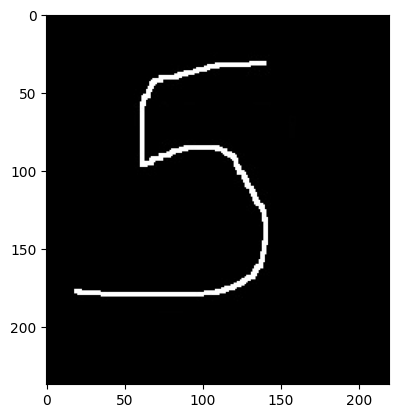

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Read the image
img = mpimg.imread(r"C:\Users\HP\Downloads\five.jpg")

# Display the image
plt.imshow(img) 
plt.show()


In [21]:
from PIL import Image
predicted_digit=predict_user_input(r"C:\Users\HP\Downloads\five.jpg")
print(f"predicted_digit : {predicted_digit}")  #2 3 4 5 6 7 8

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
predicted_digit : 5
